In [1]:
!git clone https://github.com/akTwelve/Mask_RCNN.git updated_mask_rcnn

fatal: destination path 'updated_mask_rcnn' already exists and is not an empty directory.


In [2]:
!pip install -r updated_mask_rcnn/requirements.txt
!pip install pycocotools

In [3]:
%cd RE_Mask_RCNN

!python /home/s6207967/RE_Mask_RCNN/updated_mask_rcnn/setup.py install

[Errno 2] No such file or directory: 'RE_Mask_RCNN'
/home/s6207967/RE_Mask_RCNN
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
error: package directory 'mrcnn' does not exist


In [4]:
%matplotlib inline

In [5]:
import os
import sys
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
# Root directory of the project
ROOT_DIR = os.path.abspath("/home/s6207967/RE_Mask_RCNN") ## PATH_TO_YOUR_WORK_DIRECTORY

# Import Mask RCNN from the Github installation
sys.path.append(ROOT_DIR)  # To find local version
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.visualize import display_instances
from mrcnn.model import log

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


# Import COCO config for the dataset
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version of coco
from RE_Mask_RCNN.updated_mask_rcnn.samples.coco import coco

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to your trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "updated_mask_rcnn/samples/mask_rcnn_coco.h5")

Using TensorFlow backend.


In [6]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
config = InferenceConfig()

In [7]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on the COCO dataset 
model.load_weights(COCO_MODEL_PATH, by_name=True)

# # Load the image for current task  
# image_path = "/home/s6207967/RE_Mask_RCNN/updated_mask_rcnn/images/monks.jpg"
# img = load_img(image_path)
# img = img_to_array(img)

# # Make prediction
# results = model.detect([img], verbose=1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
# Load the image for current task  
image_path = "/home/s6207967/RE_Mask_RCNN/image1/11.jpg"
img = load_img(image_path)
img = img_to_array(img)

# Make prediction
results = model.detect([img], verbose=1)

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [17]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

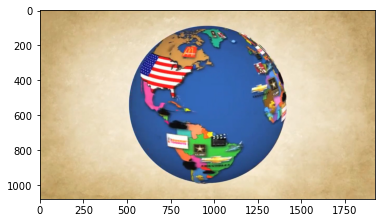

In [18]:
# from mrcnn.visualize import display_images
# display_images([img])
# plt.imshow(img.astype(np.uint8))
# plt.show()

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

[[ 111  526 1008 1431]]
[34]
[0.8542262]
kite


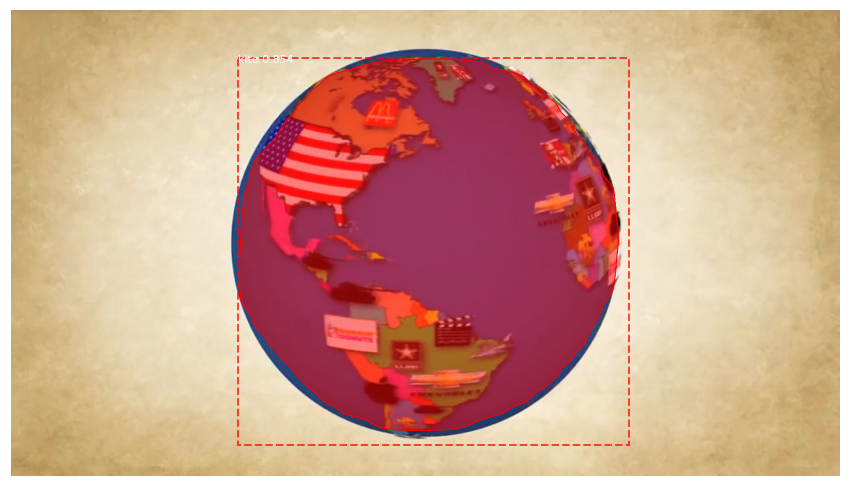

In [19]:
# get dictionary for first prediction
%matplotlib inline
image_results = results[0]

box, mask, classID, score = image_results['rois'], image_results['masks'], image_results['class_ids'], image_results['scores']

print(box)
print(classID)
print(score)

for ID in classID:
    print(class_names[ID])

# show photo with bounding boxes, masks, class labels and scores
fig_images, cur_ax = plt.subplots(figsize=(15, 15))
display_instances(img, box, mask, classID, class_names, score, ax=cur_ax)
# display_instances(img, box, mask, classID, class_names, score)

In [20]:
import pandas as pd
# print(results)

df1=pd.DataFrame(box)
df1.columns =['x1','y1','x2','y2']

df1['score'] = score
df1['classID'] = classID

print(df1)

    x1   y1    x2    y2     score  classID
0  111  526  1008  1431  0.854226       34


In [21]:
maskt=mask.transpose()

cntmask=[]
for i in range(len(maskt)):
    print(i)
    sum=0
    
    for x in maskt[i]:
        for y in x:
            sum+=y
    cntmask.append(sum)
    print(cntmask)

0
[597486]


In [22]:
df1['cntmask'] = cntmask

listdf = []
listdf.append(df1)

In [15]:
# pd.concat(listdf).to_csv('listdf')

REAL CODE HERE